In [ ]:
import os
import numpy as np
import cv2
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import os
import numpy as np
import cv2
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def load_data(data_dir, img_size=(150, 150)):
    X = []
    y = []
    for label in ["NORMAL", "PNEUMONIA"]:
        path = os.path.join(data_dir, label)
        class_num = 0 if label == "NORMAL" else 1
        for img_file in os.listdir(path):
            try:
                img_path = os.path.join(path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, img_size)
                X.append(img)
                y.append(class_num)
            except Exception as e:
                print(f"Error loading image {img_file}: {e}")
    X = np.array(X)
    y = np.array(y)
    return X, y

# Load training and testing data
train_dir = "drive/MyDrive/Python project/chest_xray/train"
test_dir = "drive/MyDrive/Python project/chest_xray/test"

X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

# Check the shape
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")

Training Data Shape: (5241, 150, 150), Testing Data Shape: (624, 150, 150)


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

print(f"Flattened Train Data Shape: {X_train_flat.shape}")
print(f"Flattened Test Data Shape: {X_test_flat.shape}")

Flattened Train Data Shape: (5241, 22500)
Flattened Test Data Shape: (624, 22500)


In [ ]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train_flat, y_train)
y_pred = svm_classifier.predict(X_test_flat)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["NORMAL", "PNEUMONIA"]))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 83.17%
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.97      0.57      0.72       234
   PNEUMONIA       0.79      0.99      0.88       390

    accuracy                           0.83       624
   macro avg       0.88      0.78      0.80       624
weighted avg       0.86      0.83      0.82       624

Confusion Matrix:
[[133 101]
 [  4 386]]


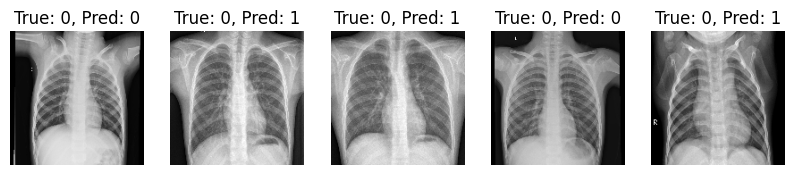

In [ ]:
def plot_sample_images(X_test, y_test, y_pred, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_test[i], cmap='gray')
        plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
        plt.axis('off')
    plt.show()

# Plot some predictions
plot_sample_images(X_test, y_test, y_pred)

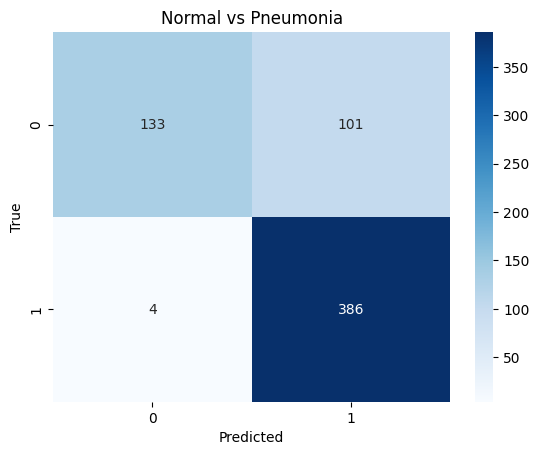

In [ ]:
import seaborn as sns
plt.title('Normal vs Pneumonia')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()